# Scalability Model (Storage Targets)

__26/06/2021__

## Storage Targets Test #04

- 8 computing nodes
- 8 clients (processes) per node.
- 4 storage target.

In [1]:
# import sys  
# sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

# from commons import csv, charts
# import pandas as pd

# dfa = csv.load_ior('csv/old/output.csv')
# dft = cmm.load_tracker_csv('csv/old/tracker.csv')

In [2]:
# # select the right files
# dft = dft.loc[dft['file'] == '/beegfs/lgouveia/ior_4/testFile1'].reset_index()
# dft.reset_index()

# # Create a new dataframe with the targets and the bandwidth
# columns  = ['target1', 'target2', 'target3', 'target4']

# df = pd.DataFrame()
# df['bw'] = dfa['bw']
# df['targets'] = dft['targets']
# df[columns] = dft[columns]

# charts.bw_single_histogram(df, bins=20)
# print(f"Mean Bandwidth: {df['bw'].mean(): .2f} +/- {df['bw'].std(): .2f}")

# # Group storage targets to see how the allocation affects the BW
# grouped = df.groupby(columns).agg({'bw': ['count', 'mean', 'min', 'max']})

# # grouped_multiple.columns = ['bw_mean', 'bw_min', 'bw_max']
# grouped = grouped.reset_index()
# grouped

# re-execution

__15/07/2021__

In [3]:
import sys  
sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

from commons import csv, charts
import pandas as pd
dfa = csv.load_ior('csv/output2.csv')
dft = cmm.load_tracker_csv('csv/tracker.csv')
n_targets=4

In [4]:
t0 = dft['ctime'][0]
dft['ctime'] = dft['ctime'].apply(lambda x: (x - t0))

In [5]:
# Create a new dataframe with the targets and the bandwidth
columns  = ['target1', 'target2', 'target3', 'target4', 'ctime']

df = pd.DataFrame()
df['bw'] = dfa['bw']
df['start'] = dfa['start']
df['end'] = dfa['end']
df['targets'] = dft['targets']
df[columns] = dft[columns]

In [6]:
dk = df[:]

x = dk['ctime'].values.reshape((-1, 1))
y = dk['bw'].values.reshape((-1, 1))

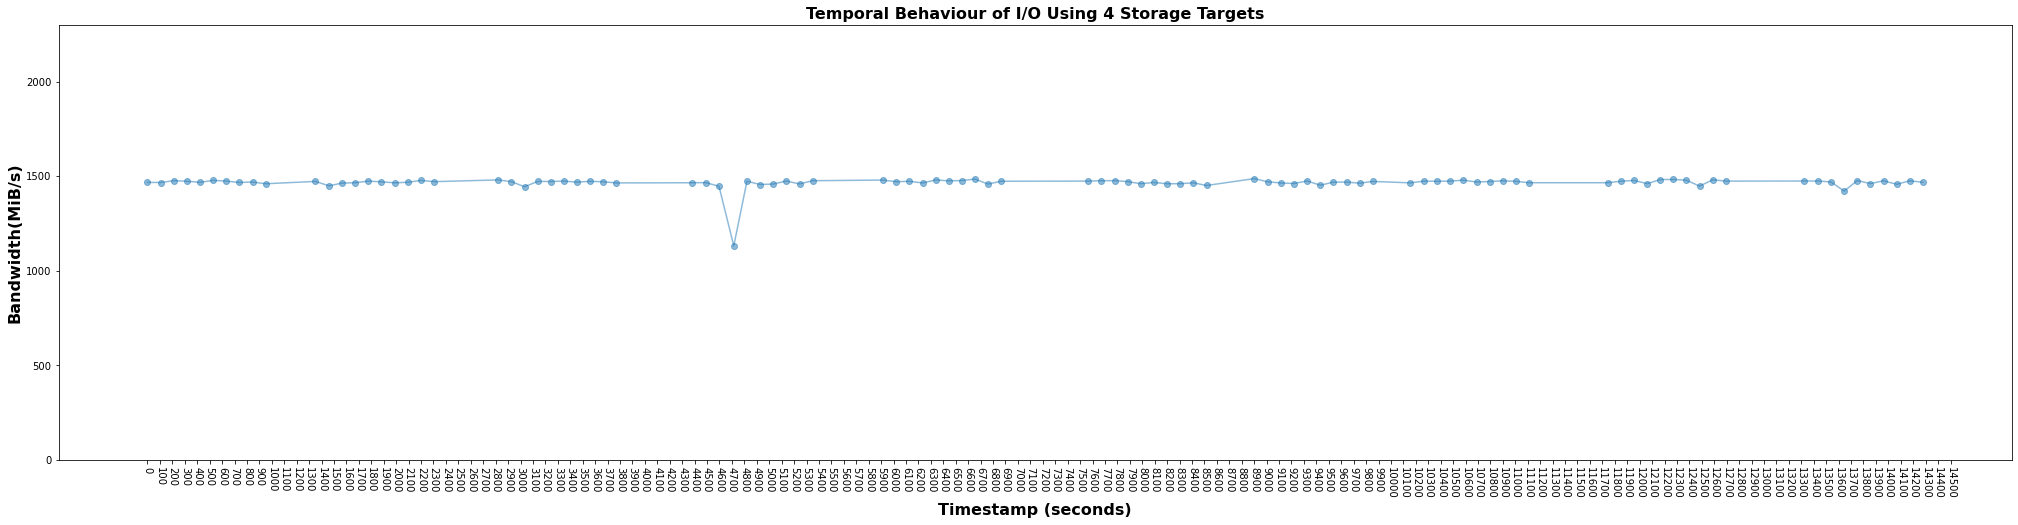

In [7]:
# %matplotlib notebook
from commons import csv, charts
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import math


fig, ax = plt.subplots()
fig.set_size_inches(35.0, 8, forward=True)

plt.plot(x, y, 'o-', alpha=0.5)

plt.xticks(range(0, 14600, 100))
plt.xticks(rotation=-90)

plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
plt.title("Temporal Behaviour of I/O Using 4 Storage Targets", fontweight ='bold', fontsize=16)


plt.ylim([0, 2300])


# plt.grid()
# fig.savefig('../graph/4st.pdf', format='pdf', dpi=1200)  

plt.show()

In [8]:
g_columns = ['target1', 'target2', 'target3', 'target4']
gb = df.groupby(g_columns).agg({'bw': ['count','mean', 'min', 'max']})
gb.columns = ['bw_count','bw_mean', 'bw_min', 'bw_max']
gb = gb.reset_index()
gb

target1 target2 target3 target4  bw_count      bw_mean   bw_min   bw_max
0     101     202     203     204        37  1465.146757  1421.83  1482.87
1     102     103     104     201        63  1466.675238  1132.19  1487.89

In [9]:
# fig, ax =plt.subplots()
# fig.set_size_inches(35.0, 8, forward=True)
# ax.axis('tight')
# ax.axis('off')

# the_table = ax.table(cellText=gb.values,colLabels=gb.columns,loc='center')
# plt.title('Groups using 4 Storage Targets', size=16, fontweight ='bold')


# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages("../graph/table_4.pdf")
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

In [10]:
df1 = df.loc[ (df['target1'] == '101') & (df['target2'] == '202') & 
              (df['target3'] == '203') & (df['target4'] == '204')]

df2 = df.loc[ (df['target1'] == '102') & (df['target2'] == '103') & 
              (df['target3'] == '104') & (df['target4'] == '201')]


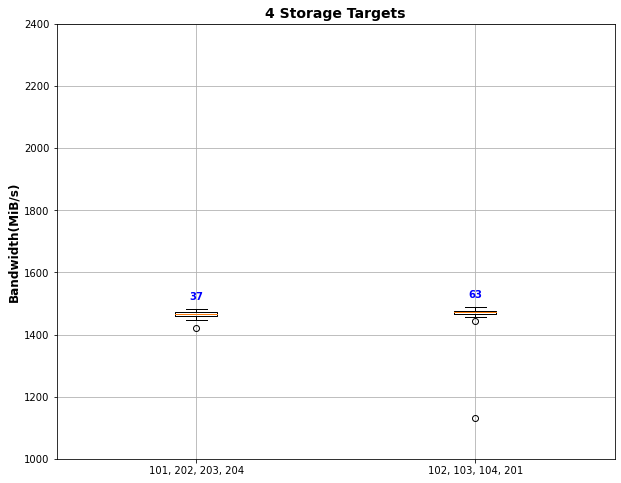

In [11]:
n_targets = 4


xlabels = ['101, 202, 203, 204',
           '102, 103, 104, 201']

dframes = [df1, df2]

cmm.boxplot(xlabels=xlabels, values=[d['bw'].values for d in dframes], 
            title=f"{n_targets} Storage Targets",
            ylabel='Bandwidth(MiB/s)',
            xlabel='',
            save_to=f'../graphs/boxplot/{n_targets}_boxplot.pdf',
            ylim=[1000,2400],
            rotation_x=0.0,
            dframes=dframes,
           plot_obs=True)


In [12]:
# fig, ax = plt.subplots()

# fig.set_size_inches(35.0, 8, forward=True)

# plt.plot(x, y, '-', alpha=0.3)

# plt.xticks(range(0, 14600, 100))
# plt.xticks(rotation=-90)

# plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
# plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
# plt.title("Temporal Behaviour of I/O Using 4 Storage Targets", fontweight ='bold', fontsize=24)

# plt.ylim([0, 2300])


# x1 = df1['ctime'].values.reshape((-1, 1))
# y1 = df1['bw'].values.reshape((-1, 1))
# plt.scatter(x1, y1, color='red', label='101, 202, 203 and 204')

# x2 = df2['ctime'].values.reshape((-1, 1))
# y2 = df2['bw'].values.reshape((-1, 1))
# plt.scatter(x2, y2, color='green', label='102, 103, 104 and 201')

# plt.legend(fontsize=16)
# # plt.grid()
# fig.savefig('../graph/4st.pdf', format='pdf', dpi=1200)  

# plt.show()